### Object Detection using YOLO ###

In [2]:
import os
import cv2
import random
import pandas as pd
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os
from PIL import Image
import cv2
from IPython.display import display, Image
from IPython import display
random.seed(77)

Loading the dataset

In [3]:
datasetDir = "C:\\Users\\USER\\OneDrive\\Desktop\\Datasets\\DL\\YOLO"

Specifying the directory containing training and validation

In [4]:
train_dir = os.path.join(datasetDir, "C:\\Users\\USER\\OneDrive\\Desktop\\Datasets\\DL\\YOLO\\train\\images")
val_dir = os.path.join(datasetDir, "C:\\Users\\USER\\OneDrive\\Desktop\\Datasets\\DL\\YOLO\\val\\images")
label_dir_train = os.path.join(datasetDir, "C:\\Users\\USER\\OneDrive\\Desktop\\Datasets\\DL\\YOLO\\train\\labels")
label_dir_val = os.path.join(datasetDir, "C:\\Users\\USER\\OneDrive\\Desktop\\Datasets\\DL\\YOLO\\val\\labels")

Getting the list of all the images in the train directory

In [5]:
image_files = [f for f in os.listdir(train_dir) if f.endswith((".jpg", ".jpeg"))]

Randomly selecting one image to display

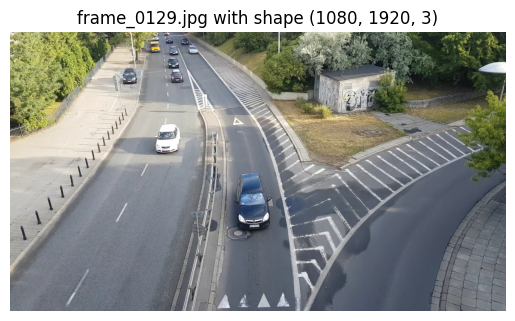

In [6]:
random_image = random.choice(image_files)

image_path = os.path.join(train_dir, random_image)
image = cv2.imread(image_path)  
img_shape = image.shape
if image is not None:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
    plt.title(f"{random_image} with shape {img_shape}")
    plt.axis('off')
    plt.show()
else:
    print(f"Failed to read {random_image}")

Displaying the labels of the image

In [7]:
label_file_path = "C:\\Users\\USER\\OneDrive\\Desktop\\Datasets\\DL\\YOLO\\train\\labels\\frame_0007.txt"

column_names = ["class", "x_min", "y_min", "x_max", "y_max"]
df = pd.read_csv(label_file_path, header=None, names=column_names, sep=" ")
df

,class,x_min,y_min,x_max,y_max
0,0,0.182031,0.526852,0.091146,0.144444
1,0,0.497656,0.494907,0.070312,0.173148
2,0,0.468229,0.326852,0.048958,0.114815
3,0,0.330469,0.276389,0.042188,0.095370
4,0,0.291667,0.148148,0.032292,0.062963
5,0,0.238542,0.137037,0.032292,0.062963
6,0,0.296094,0.054630,0.019271,0.035185
7,0,0.320052,0.024074,0.019271,0.035185


In [8]:
num_train_images = len([f for f in os.listdir(train_dir) if f.endswith((".jpg", ".jpeg"))])
num_val_images = len([f for f in os.listdir(val_dir) if f.endswith((".jpg", ".jpeg"))])

total_images = num_train_images + num_val_images # Calculating the total number of images

# Calculating the percentage of images in each folder
percentage_train = (num_train_images / total_images) * 100
percentage_val = (num_val_images / total_images) * 100

print(f"Total Number of images {total_images}")
print(f"Percentage of images in the training folder: {percentage_train:.2f}%")
print(f"Percentage of images in the validation folder: {percentage_val:.2f}%")

Total Number of images 499
Percentage of images in the training folder: 79.96%
Percentage of images in the validation folder: 20.04%


Visualizing images with bounding box


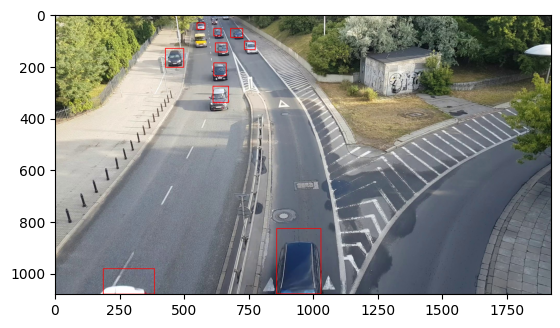

In [9]:
random_image = random.choice(image_files)

image_path = os.path.join(train_dir, random_image)
image = cv2.imread(image_path) 

label_file_path = os.path.join(label_dir_train, random_image.replace('.jpg', '.txt'))

image_height, image_width, _ = image.shape

with open(label_file_path, 'r') as file: # Reading yolo labels
    yolo_labels = file.readlines()

for label in yolo_labels:
    class_id, x_center, y_center, width, height = map(float, label.split())
    
    x_center *= image_width
    y_center *= image_height
    width *= image_width
    height *= image_height

    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    color = (0, 0, 255)
    thikness = 2
    cv2.rectangle(image, (x1, y1), (x2, y2), color, thikness)


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

Getting the class names

In [10]:
class_names = sorted([class_name for class_name in os.listdir(label_dir_train)])

class_names_str = ", ".join([f"'{name}'" for name in class_names])

# Generating yaml content

yaml_content = f"""
train: 
  - {train_dir}
  - {label_dir_train}
val: 
  - {val_dir}
  - {label_dir_val}

nc: {len(class_names)}  # number of classes
names: [{class_names_str}]  # class names in your dataset as a list
"""

with open("R:\\Projects\\traffic_dataset.yaml", "w") as f:
    f.write(yaml_content)

#### YOLO V8 Model ####

In [11]:
model = YOLO('yolov8m.pt')  

model.train(data="R:\\Projects\\traffic_dataset.yaml", epochs=1, imgsz=640)

New https://pypi.org/project/ultralytics/8.2.2 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47  Python-3.9.6 torch-2.2.2+cpu CPU (12th Gen Intel Core(TM) i5-1235U)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=R:\Projects\traffic_dataset.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fals

train: Scanning C:\Users\USER\OneDrive\Desktop\Datasets\DL\YOLO\train\labels.cache... 399 images, 0 backgrounds, 0 corrupt: 100%|██████████| 399/399 [00:00<?, ?it/s]
val: Scanning C:\Users\USER\OneDrive\Desktop\Datasets\DL\YOLO\val\labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=2.5e-05, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train4
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      1.883      5.136      1.247        285        640: 100%|██████████| 25/25 [48:39<00:00, 116.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:08<00:00, 17.25s/it]


                   all        100        493      0.472      0.381      0.456        0.2

1 epochs completed in 0.835 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 52.5MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 52.5MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics YOLOv8.1.47  Python-3.9.6 torch-2.2.2+cpu CPU (12th Gen Intel Core(TM) i5-1235U)
Model summary (fused): 218 layers, 26070781 parameters, 0 gradients, 80.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:53<00:00, 13.29s/it]


                   all        100        493      0.472      0.381      0.455        0.2
        frame_0000.txt        100        493      0.472      0.381      0.455        0.2


**Inference**

Box Loss (1.883) represents how well the model is predicting the bounding boxes around the target objects.

Class Loss (5.136) is quite high and signifies the model’s inefficiency in classifying objects into correct categories as of now.

DFL Loss (1.247) Distribution Focal Loss, related to objectness and bounding box refinement in YOLOv8.

**Evaluation metrics post training**

The precision of 0.472 indicates that about 47.2% of the predicted bounding boxes are correct, and recall of 0.381 shows that the model detected about 38.1% of all actual cases.

mAP50 (0.456) suggests that when considering a detection correct at an IoU of 50%, the performance is moderate.

mAP50-95 (0.2) average mAP score from IoU 50% to 95% (with steps of 5%) is quite low, indicating that the model’s performance drops significantly as stricter IoU thresholds are applied. This typically points to less accurate localization of the objects.

Predictions

In [ ]:
model = YOLO("runs/detect/train/weights/best.pt") 

img = cv2.imread("C:\\Users\\USER\\OneDrive\\Desktop\\Datasets\\DL\\YOLO\\val\\images\\frame_0416.jpg")
prediction = model.predict(img)[0]
print(prediction)

prediction = prediction.plot(line_width=1)
prediction = prediction[:, :, ::-1]
prediction = Image.fromarray(prediction)
prediction.save("output_image.png")

**Conclusion**

Thus the task to implement object detection using YOLO has been executed successfully. Used yolov8 to detect the objects.